In [22]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os


# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
#plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CSV 파일 불러오기 (파일 경로에 맞게 수정하세요)
df = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/실습데이터.csv') 

In [3]:
df1 = pd.read_csv('/Users/kimgayeong/Desktop/데이터톤/data 3/raw_total_data.csv')

In [4]:
# 데이터 상위 5행 보기
print(df.head())

# 데이터 형태 및 결측치 확인
print(df.info())

# 기본 통계 요약
print(df.describe())

# 컬럼별 결측치 개수
print(df.isnull().sum())

              Timestamp  OUTPUT_COUNT_DAY_1.xlsx  KO6_MOTOR_SET_FREQ.xlsx  \
0  2022-05-02 06:32:33                   25878.0                   3000.0   
1  2022-05-02 06:32:34                   25878.0                   3000.0   
2  2022-05-02 06:32:35                   25878.0                   3000.0   
3  2022-05-02 06:32:36                   25878.0                   3000.0   
4  2022-05-02 06:32:37                   25878.0                   3000.0   

   CUTTING_SET_FREQ.xlsx  STATUS.xlsx  KO5_MOTOR_SET_FREQ.xlsx  \
0                 3000.0          0.0                   3000.0   
1                 3000.0          0.0                   3000.0   
2                 3000.0          0.0                   3000.0   
3                 3000.0          0.0                   3000.0   
4                 3000.0          0.0                   3000.0   

   METAL_OIL_SUPPLY_PRESS_CONTR.xlsx  KO4_MOTOR_SET_FREQ.xlsx  \
0                            661.166                   3000.0   
1         

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579297 entries, 0 to 579296
Data columns (total 57 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Timestamp                          579297 non-null  object 
 1   OUTPUT_COUNT_DAY_1.xlsx            579297 non-null  float64
 2   KO6_MOTOR_SET_FREQ.xlsx            579297 non-null  float64
 3   CUTTING_SET_FREQ.xlsx              579297 non-null  float64
 4   STATUS.xlsx                        579297 non-null  float64
 5   KO5_MOTOR_SET_FREQ.xlsx            579297 non-null  float64
 6   METAL_OIL_SUPPLY_PRESS_CONTR.xlsx  579297 non-null  float64
 7   KO4_MOTOR_SET_FREQ.xlsx            579297 non-null  float64
 8   KO2_MOTOR_SET_FREQ.xlsx            579297 non-null  float64
 9   MAIN_MOTOR_CURR.xlsx               579297 non-null  float64
 10  KO3_MOTOR_SET_FREQ.xlsx            579297 non-null  float64
 11  TRANS_POS_UP_SET_H.xlsx            5792

In [6]:
# 데이터 상위 5행 보기
print(df1.head())

# 데이터 형태 및 결측치 확인
print(df1.info())

# 기본 통계 요약
print(df1.describe())

# 컬럼별 결측치 개수
print(df1.isnull().sum())

   Unnamed: 0             Timestamp  OUTPUT_COUNT_DAY_1.xlsx  \
0           0  2022-05-02 06:32:33                   25878.0   
1           1  2022-05-02 06:32:34                       NaN   
2           2  2022-05-02 06:32:35                       NaN   
3           3  2022-05-02 06:32:36                       NaN   
4           4  2022-05-02 06:32:37                       NaN   

   KO6_MOTOR_SET_FREQ.xlsx  CUTTING_SET_FREQ.xlsx  STATUS.xlsx  \
0                   3000.0                 3000.0          0.0   
1                      NaN                    NaN          NaN   
2                      NaN                    NaN          NaN   
3                      NaN                    NaN          NaN   
4                      NaN                    NaN          NaN   

   KO5_MOTOR_SET_FREQ.xlsx  METAL_OIL_SUPPLY_PRESS_CONTR.xlsx  \
0                   3000.0                            661.166   
1                      NaN                            798.000   
2                      

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579297 entries, 0 to 579296
Data columns (total 58 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         579297 non-null  int64  
 1   Timestamp                          579297 non-null  object 
 2   OUTPUT_COUNT_DAY_1.xlsx            472200 non-null  float64
 3   KO6_MOTOR_SET_FREQ.xlsx            31 non-null      float64
 4   CUTTING_SET_FREQ.xlsx              30 non-null      float64
 5   STATUS.xlsx                        138 non-null     float64
 6   KO5_MOTOR_SET_FREQ.xlsx            31 non-null      float64
 7   METAL_OIL_SUPPLY_PRESS_CONTR.xlsx  577321 non-null  float64
 8   KO4_MOTOR_SET_FREQ.xlsx            31 non-null      float64
 9   KO2_MOTOR_SET_FREQ.xlsx            31 non-null      float64
 10  MAIN_MOTOR_CURR.xlsx               553059 non-null  float64
 11  KO3_MOTOR_SET_FREQ.xlsx            31 n

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp']

0        2022-05-02 06:32:33
1        2022-05-02 06:32:34
2        2022-05-02 06:32:35
3        2022-05-02 06:32:36
4        2022-05-02 06:32:37
                 ...        
579292   2022-05-14 04:34:32
579293   2022-05-14 04:34:33
579294   2022-05-14 04:34:39
579295   2022-05-14 04:34:40
579296   2022-05-14 04:34:46
Name: Timestamp, Length: 579297, dtype: datetime64[ns]

## 가설1. 설비 가동 시간이 많을수록 생산량이 많을 것?

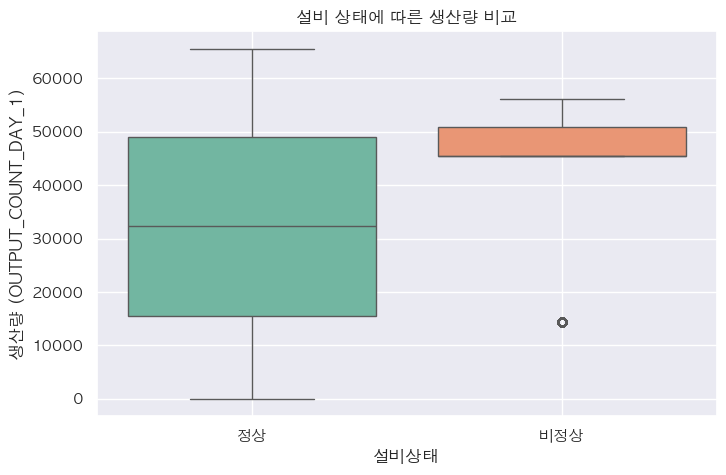

상태별 생산량 평균:
 설비상태
비정상    41661.630719
정상     32369.645332
Name: OUTPUT_COUNT_DAY_1.xlsx, dtype: float64

T-test 결과: t = -29.812, p = 0.00000
→ 생산량에 유의미한 차이가 있습니다.


In [30]:
from scipy.stats import ttest_ind

# 1. 필요한 컬럼만 추출
df_sub = df[['STATUS.xlsx', 'OUTPUT_COUNT_DAY_1.xlsx']].copy()

# 2. 정상/비정상 상태만 필터링
df_filtered = df_sub[df_sub['STATUS.xlsx'].isin([0.5, 2])]

# 3. 상태값을 텍스트로 변환 (시각화용)
df_filtered['설비상태'] = df_filtered['STATUS.xlsx'].map({0.5: '비정상', 2: '정상'})

# 4. 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='설비상태', y='OUTPUT_COUNT_DAY_1.xlsx', data=df_filtered, palette='Set2')
plt.title("설비 상태에 따른 생산량 비교")
plt.ylabel("생산량 (OUTPUT_COUNT_DAY_1)")
plt.grid(True)
plt.show()

# 5. 평균 비교
mean_prod = df_filtered.groupby('설비상태')['OUTPUT_COUNT_DAY_1.xlsx'].mean()
print("상태별 생산량 평균:\n", mean_prod)

# 6. 통계 검정 (t-test)
group1 = df_filtered[df_filtered['설비상태'] == '정상']['OUTPUT_COUNT_DAY_1.xlsx']
group2 = df_filtered[df_filtered['설비상태'] == '비정상']['OUTPUT_COUNT_DAY_1.xlsx']
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)

print(f"\nT-test 결과: t = {t_stat:.3f}, p = {p_val:.5f}")
if p_val < 0.05:
    print("→ 생산량에 유의미한 차이가 있습니다.")
else:
    print("→ 생산량 차이가 통계적으로 유의하지 않습니다.")

In [33]:
corr = daily[['Operating_Hours', 'OUTPUT_COUNT_DAY_1.xlsx']].corr()
print("상관계수:\n", corr)

상관계수:
                          Operating_Hours  OUTPUT_COUNT_DAY_1.xlsx
Operating_Hours                 1.000000                 0.950787
OUTPUT_COUNT_DAY_1.xlsx         0.950787                 1.000000


- 0.7 ~ 1.0 : 강한 상관관계

In [35]:
X = sm.add_constant(daily['Operating_Hours'])  # 독립 변수 (X)에 상수항 추가
y = daily['OUTPUT_COUNT_DAY_1.xlsx']           # 종속 변수 (y)
model = sm.OLS(y, X).fit()                     # 회귀 모델 피팅
print(model.summary())                         # 결과 요약 출력

                               OLS Regression Results                              
Dep. Variable:     OUTPUT_COUNT_DAY_1.xlsx   R-squared:                       0.904
Model:                                 OLS   Adj. R-squared:                  0.894
Method:                      Least Squares   F-statistic:                     94.16
Date:                     Thu, 24 Jul 2025   Prob (F-statistic):           2.09e-06
Time:                             11:45:48   Log-Likelihood:                -247.25
No. Observations:                       12   AIC:                             498.5
Df Residuals:                           10   BIC:                             499.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

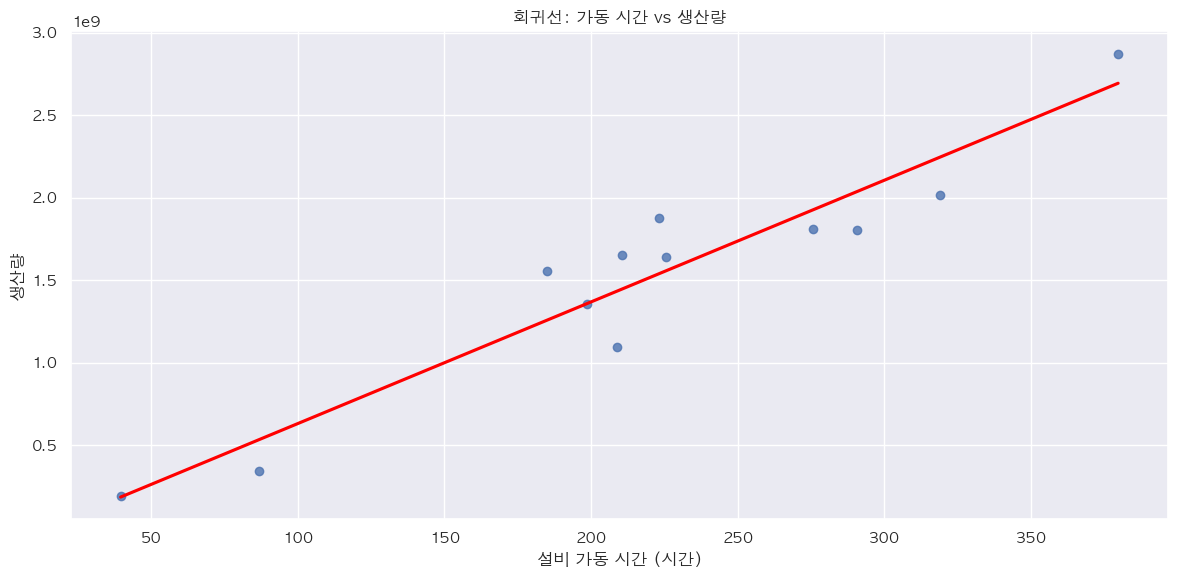

In [37]:
sns.regplot(
    data=daily,
    x='Operating_Hours',
    y='OUTPUT_COUNT_DAY_1.xlsx',
    ci=None,
    line_kws={"color": "red"}
)
plt.title('회귀선: 가동 시간 vs 생산량')
plt.xlabel('설비 가동 시간 (시간)')
plt.ylabel('생산량')
plt.grid(True)
plt.tight_layout()
plt.show()

### 비효율 계산하기 : 효율성 = 생산량 / 가동시간 값이 낮음
=> 즉, 같은 시간 동안 생산량이 적은 비효율

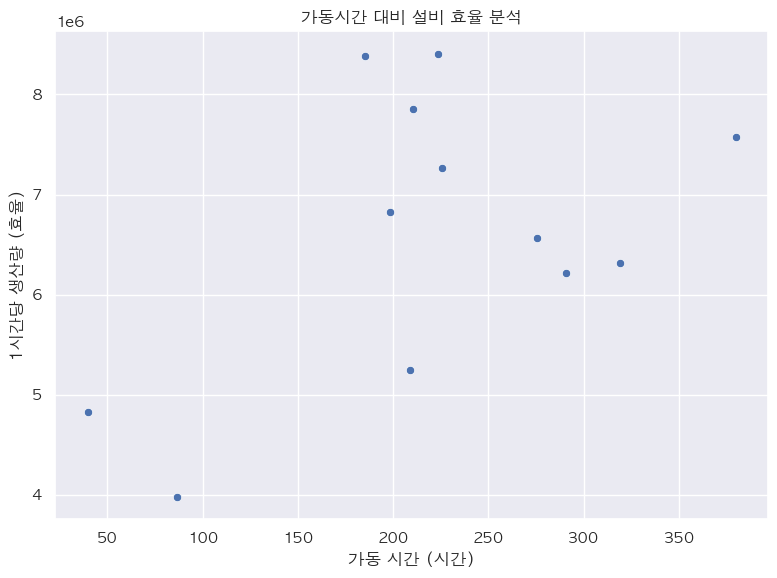

In [44]:
# 효율성 계산
daily['Efficiency'] = daily['OUTPUT_COUNT_DAY_1.xlsx'] / daily['Operating_Hours']

# 시각화: 효율성 vs. 가동시간
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=daily, x='Operating_Hours', y='Efficiency')
plt.title('가동시간 대비 설비 효율 분석')
plt.xlabel('가동 시간 (시간)')
plt.ylabel('1시간당 생산량 (효율)')
plt.grid(True)
plt.tight_layout()
plt.show()

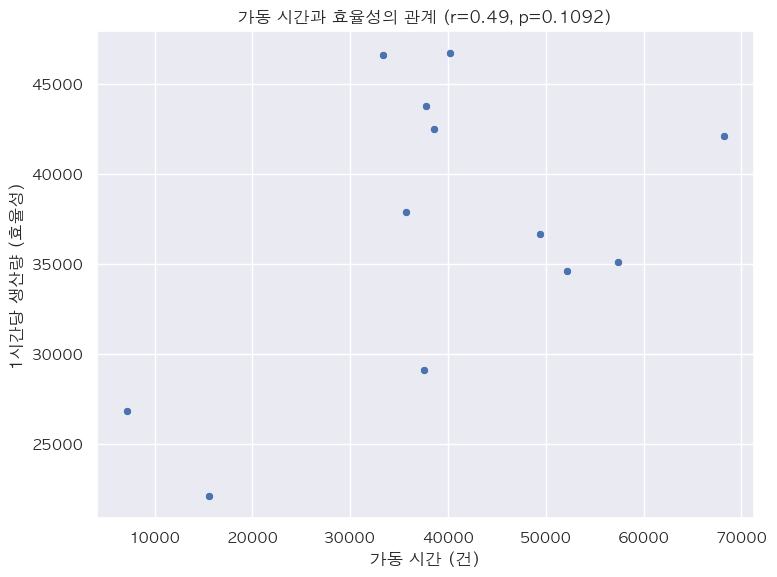

상관계수 (r): 0.4859
p-value: 0.1092


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Timestamp를 datetime으로 변환
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# STATUS.xlsx가 2일 경우만 필터링 (정상 가동시간 기준)
df['Operating'] = df['STATUS.xlsx'].apply(lambda x: 1 if x == 2 else 0)

# 하루 단위로 가동시간과 생산량 집계
daily = df.groupby(df['Timestamp'].dt.date).agg({
    'Operating': 'sum',
    'OUTPUT_COUNT_DAY_1.xlsx': 'sum'
}).rename(columns={'Operating': 'Operating_Hours'})

# 효율성 계산: 시간당 생산량
daily['Efficiency'] = daily['OUTPUT_COUNT_DAY_1.xlsx'] / daily['Operating_Hours']

# 상관계수 계산
corr_coef, p_value = pearsonr(daily['Operating_Hours'], daily['Efficiency'])

# 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(data=daily, x='Operating_Hours', y='Efficiency')
plt.title(f'가동 시간과 효율성의 관계 (r={corr_coef:.2f}, p={p_value:.4f})')
plt.xlabel('가동 시간 (건)')
plt.ylabel('1시간당 생산량 (효율성)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 출력
print(f"상관계수 (r): {corr_coef:.4f}")
print(f"p-value: {p_value:.4f}")

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Timestamp를 datetime 형식으로 변환
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# 설비 가동 여부를 정리 (STATUS.xlsx = 2는 정상 가동 상태로 정의)
df['Is_Operating'] = df['STATUS.xlsx'].apply(lambda x: 1 if x == 2 else 0)

# 날짜별로 가동 시간과 생산량 집계
daily = df.groupby(df['Timestamp'].dt.date).agg({
    'Is_Operating': 'sum',                      # 하루 동안 설비가 정상 가동한 횟수
    'OUTPUT_COUNT_DAY_1.xlsx': 'sum'            # 하루 총 생산량
}).rename(columns={
    'Is_Operating': 'Operating_Hours',
    'OUTPUT_COUNT_DAY_1.xlsx': 'Daily_Output'
}).reset_index()

In [52]:
daily

,Timestamp,Operating_Hours,Daily_Output
0,2022-05-02,40203,1.878084e+09
1,2022-05-03,57419,2.014342e+09
2,2022-05-04,52208,1.807177e+09
3,2022-05-05,37582,1.094634e+09
4,2022-05-06,68249,2.875344e+09
5,2022-05-07,15609,3.448908e+08
6,2022-05-09,37789,1.654554e+09
7,2022-05-10,35730,1.354184e+09
8,2022-05-11,33331,1.553108e+09
9,2022-05-12,49391,1.811038e+09


In [55]:
print(df['Timestamp'].dt.date.nunique())
print(df['Timestamp'].dt.date.value_counts().sort_index())

12
Timestamp
2022-05-02    62775
2022-05-03    63352
2022-05-04    62553
2022-05-05    41522
2022-05-06    78900
2022-05-07    15658
2022-05-09    45880
2022-05-10    46199
2022-05-11    46364
2022-05-12    62287
2022-05-13    46348
2022-05-14     7459
Name: count, dtype: int64


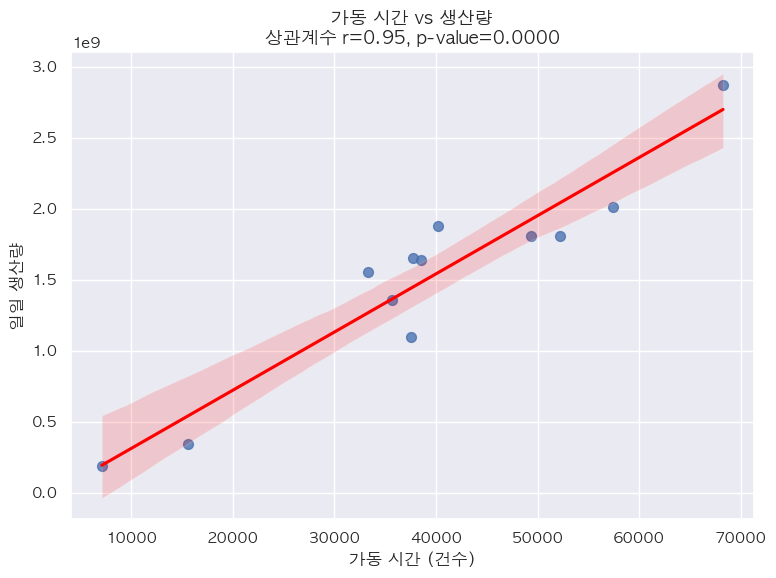

📊 상관계수 (r): 0.9491
📉 p-value: 0.0000


In [50]:
# 상관계수 계산
corr, pval = pearsonr(daily['Operating_Hours'], daily['Daily_Output'])

# 산점도 시각화
plt.figure(figsize=(8, 6))
sns.regplot(data=daily, x='Operating_Hours', y='Daily_Output', scatter_kws={"s": 50}, line_kws={"color": "red"})
plt.title(f'가동 시간 vs 생산량\n상관계수 r={corr:.2f}, p-value={pval:.4f}', fontsize=13)
plt.xlabel('가동 시간 (건수)')
plt.ylabel('일일 생산량')
plt.grid(True)
plt.tight_layout()
plt.show()

# 결과 출력
print(f"📊 상관계수 (r): {corr:.4f}")
print(f"📉 p-value: {pval:.4f}")

# 상관계수 r

- r > 0: 가동 시간 많을수록 생산량 증가 (양의 상관)

- r ≈ 0: 가동 시간과 생산량에 큰 상관 없음

- r < 0: 가동 시간 많아도 생산량 감소 → 비효율

# p-value

- p < 0.05: 통계적으로 유의미한 상관

- p ≥ 0.05: 우연일 가능성 존재

# 2.생산량이 높을수록 비효율이 적을까?

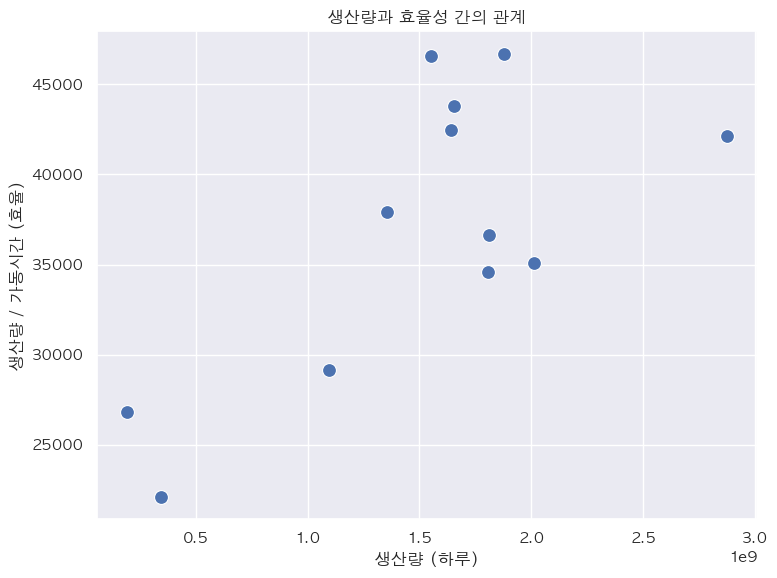

피어슨 상관계수: 0.712, p-value: 0.0094


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 날짜 컬럼이 datetime 형태인지 확인
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# '설비가동 시간' = 하루 중 STATUS가 2(정상)인 시간의 합
df['is_operating'] = df['STATUS.xlsx'] == 2

# 날짜 단위로 집계: 하루 생산량, 하루 가동시간
daily = df.groupby(df['Timestamp'].dt.date).agg({
    'OUTPUT_COUNT_DAY_1.xlsx': 'sum',
    'is_operating': 'sum'  # 정상적으로 가동된 시간의 개수
}).rename(columns={
    'OUTPUT_COUNT_DAY_1.xlsx': 'daily_output',
    'is_operating': 'operating_hours'
})

# 효율성 지표 추가
daily['efficiency'] = daily['daily_output'] / daily['operating_hours']

# 산점도로 생산량 vs 효율 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(data=daily, x='daily_output', y='efficiency', s=100)
plt.title('생산량과 효율성 간의 관계')
plt.xlabel('생산량 (하루)')
plt.ylabel('생산량 / 가동시간 (효율)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 상관관계 분석
corr, pval = pearsonr(daily['daily_output'], daily['efficiency'])
print(f"피어슨 상관계수: {corr:.3f}, p-value: {pval:.4f}")

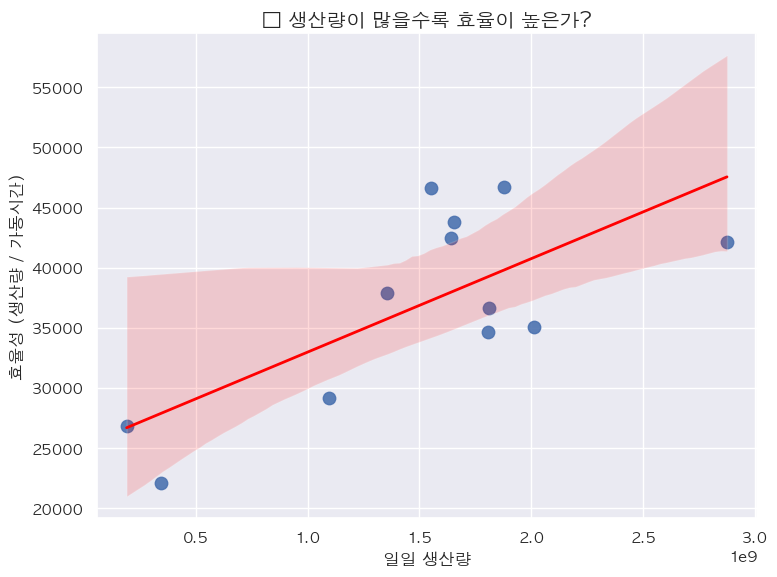

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.regplot(
    data=daily,
    x='daily_output',         # 생산량
    y='efficiency',           # 효율성 (생산량 / 가동시간)
    scatter_kws={'s': 80, 'alpha': 0.9},
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.title('📈 생산량이 많을수록 효율이 높은가?', fontsize=14)
plt.xlabel('일일 생산량', fontsize=12)
plt.ylabel('효율성 (생산량 / 가동시간)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [63]:
from scipy.stats import pearsonr

corr, pval = pearsonr(daily['daily_output'], daily['efficiency'])
print(f"📊 상관계수 r: {corr:.3f}")
print(f"📉 p-value: {pval:.4f}")

📊 상관계수 r: 0.712
📉 p-value: 0.0094
